In [ ]:
import torch

In [ ]:
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda')

In [ ]:
device

device(type='cuda')

In [ ]:
input_size = 784 # 28x28
hidden_size = 512
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data',train = True,
                                          transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root='./data',train = False,
                                          transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,
                                           shuffle = False)

In [ ]:
#import pandas as pd
#df = pd.read_csv("/content/data2/train.csv")
#df.head()
##train_dataset = df.iloc[:int(df.shape[0]*0.85)]
#train_dataset.shape
#train_dataset.tail()
#test_dataset = df.iloc[-int(df.shape[0]*0.85):]
#test_dataset.shape
#df_X = torch.Tensor(X.values)
#df_y = torch.Tensor(y.values)
#print("train_dataset",df_X.shape)
#train_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,
#                                           shuffle = False)

In [ ]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


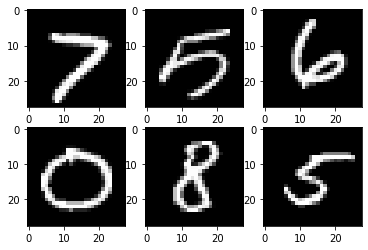

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, hidden_size)
    self.l3 = nn.Linear(hidden_size, hidden_size)
    self.l4 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.relu(out)
    out = self.l3(out)
    out = self.relu(out)
    out = self.l4(out)
    
    return out

In [ ]:
model = NeuralNet(input_size,hidden_size,num_classes)
model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=512, out_features=512, bias=True)
  (l3): Linear(in_features=512, out_features=512, bias=True)
  (l4): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs,labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')




epoch 1 / 20, step 100/600, loss = 0.3246
epoch 1 / 20, step 200/600, loss = 0.2531
epoch 1 / 20, step 300/600, loss = 0.1132
epoch 1 / 20, step 400/600, loss = 0.0537
epoch 1 / 20, step 500/600, loss = 0.1350
epoch 1 / 20, step 600/600, loss = 0.2360
epoch 2 / 20, step 100/600, loss = 0.0809
epoch 2 / 20, step 200/600, loss = 0.0840
epoch 2 / 20, step 300/600, loss = 0.1378
epoch 2 / 20, step 400/600, loss = 0.1456
epoch 2 / 20, step 500/600, loss = 0.0929
epoch 2 / 20, step 600/600, loss = 0.0242
epoch 3 / 20, step 100/600, loss = 0.1121
epoch 3 / 20, step 200/600, loss = 0.0872
epoch 3 / 20, step 300/600, loss = 0.0814
epoch 3 / 20, step 400/600, loss = 0.1034
epoch 3 / 20, step 500/600, loss = 0.0404
epoch 3 / 20, step 600/600, loss = 0.0061
epoch 4 / 20, step 100/600, loss = 0.0098
epoch 4 / 20, step 200/600, loss = 0.0535
epoch 4 / 20, step 300/600, loss = 0.0231
epoch 4 / 20, step 400/600, loss = 0.0118
epoch 4 / 20, step 500/600, loss = 0.0326
epoch 4 / 20, step 600/600, loss =

In [ ]:
#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100 * n_correct / n_samples
  print(f'accuracy = {acc}')

accuracy = 98.2


In [ ]:
import pandas as pd


test_dataset = pd.read_csv("/content/data2/test.csv")
test_dataset = torch.Tensor(test_dataset.values)
print("test_dataset",test_dataset.shape)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,
                                           shuffle = False)
pred = []
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images in test_loader:
    images = images.reshape(-1,28*28).to(device)
    outputs = model(images)
    print("OUTPUTS",outputs.shape)
    _, predictions = torch.max(outputs,1)
    pred.append(predictions.detach().cpu().numpy())
    
    print("predictions",predictions.shape)


In [ ]:
import numpy as np

p = np.array(pred)
p = p.flatten()
print(p.shape)

idx = [i+1 for i in range(len(p))]

(28000,)


In [ ]:
print(idx)

In [ ]:
my_submission = pd.DataFrame({'ImageId': idx, 'Label': p})
my_submission.to_csv('/content/data2/submission3.csv', index=False)
my_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
print(type(pred))

<class 'list'>


In [ ]:
print(predictions)

tensor([2, 2, 2, 5, 1, 9, 4, 0, 1, 1, 3, 4, 0, 6, 9, 8, 6, 7, 2, 4, 0, 6, 8, 0,
        2, 5, 1, 5, 4, 4, 7, 1, 1, 0, 7, 7, 0, 9, 9, 2, 6, 5, 9, 1, 9, 6, 7, 9,
        9, 2, 8, 2, 5, 0, 1, 1, 3, 1, 7, 2, 3, 9, 9, 1, 9, 3, 4, 0, 3, 3, 5, 0,
        4, 8, 0, 3, 6, 0, 1, 9, 3, 1, 1, 0, 4, 5, 2, 2, 9, 6, 7, 6, 1, 9, 7, 9,
        7, 3, 9, 2], device='cuda:0')
